[View in Colaboratory](https://colab.research.google.com/github/skepsun/fractal_wavelets/blob/master/MF_ADF.ipynb)

In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('drive/My Drive/data/prices.csv')

In [0]:
prices = df['close']

In [0]:
def MF_ADF(x,n_vec,q_vec,k):
  s_vec = [np.floor(len(x)/n) for n in n_vec]
  y = np.cumsum(x - np.mean(x))
  F = np.zeros([len(q_vec),len(n_vec)])
  hurst = np.zeros([len(q_vec),])
  tau = np.zeros([len(q_vec),])
  spec = np.zeros([len(q_vec),])
  for i,q in enumerate(q_vec):
    for j,n in enumerate(n_vec):
      s = int(s_vec[j])
      F_s_v = np.zeros([2*n,])
      for v in range(n):
        tmp_x = list(range(s))
        tmp_y = y[v*s:(v+1)*s]
        p = np.poly1d(np.polyfit(tmp_x,tmp_y,k))
        fit_y = p(tmp_x)
        mse = np.mean((tmp_y-fit_y)**2)
        F_s_v[v] = mse
      for v in range(n):
        tmp_x = list(range(s))
        tmp_y = y[(len(y)-(v+1)*s):(len(y)-v*s)]
#         print(len(tmp_x),len(tmp_y))
        p = np.poly1d(np.polyfit(tmp_x,tmp_y,k))
        fit_y = p(tmp_x)
        mse = np.mean((tmp_y-fit_y)**2)
        F_s_v[v+n] = np.sqrt(mse)
        
      if q!=0: F[i,j] = np.mean(F_s_v**q)**(1/q)
      else: F[i,j] = np.exp(np.mean(np.log(F_s_v**2)))
        
    [hurst[i],_] = np.polyfit(np.log(s_vec),np.log(F[i,:]),1)
    tau[i] = q*hurst[i] - 1
    spec[i] = q*(tau[i]-hurst[i]) + 1
  return [F, hurst, tau, spec]

In [0]:
n_vec = list(range(3,101))
q_vec = list(range(-10,11))
k=1
[F, hurst, tau, spec] = MF_ADF(prices.values,n_vec,q_vec,k)

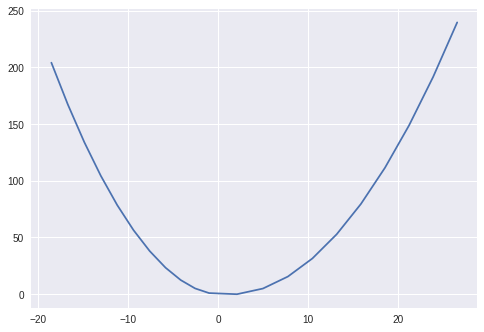

In [42]:
plt.plot(tau, spec)
plt.show()